In [76]:
import pandas as pd # open the file, read it then close it.
import numpy as np # 

file = open('Edited Boston Dataset.txt', 'r')
data = pd.DataFrame(file)
print(data.info())
print(data.head(3))
print(data.shape)
file.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 1 columns):
0    1016 non-null object
dtypes: object(1)
memory usage: 8.0+ KB
None
                                                   0
0                                                 \n
1                                                 \n
2   0.00632  18.00   2.310  0  0.5380  6.5750  65...
(1016, 1)


In [77]:
data = pd.read_csv('Edited Boston Dataset.txt', sep = '\t', header = None)
print(data.info())
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
0    1013 non-null object
dtypes: object(1)
memory usage: 8.0+ KB
None
                                                   0
0   0.00632  18.00   2.310  0  0.5380  6.5750  65...
1                               396.90   4.98  24.00
2   0.02731   0.00   7.070  0  0.4690  6.4210  78...


In [78]:
file = pd.read_csv('exp_boston', sep="\t", header=None)
data = pd.DataFrame(file)
print(data.head())
print(data.info())
print(data.shape)

                                                   0
0   0.00632  18.00   2.310  0  0.5380  6.5750  65...
1   0.02731   0.00   7.070  0  0.4690  6.4210  78...
2   0.02729   0.00   7.070  0  0.4690  7.1850  61...
3   0.03237   0.00   2.180  0  0.4580  6.9980  45...
4   0.06905   0.00   2.180  0  0.4580  7.1470  54...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
0    12 non-null object
dtypes: object(1)
memory usage: 176.0+ bytes
None
(12, 1)


In [5]:
data.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
print(data.info())

ValueError: Length mismatch: Expected axis has 1 elements, new values have 14 elements

# Comments about this approach:

### Obtaining the data through pandas alone from the website from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
### did not work.  The data was loaded as a csv and as a txt and both ways of loading the data yeilded the same result;
### The reader interpreted the shape of the data to be (506, 1).  Since relabelling columns doesn't work because this requires
### 13 different labels, only one is expected.  Although columns can be reassigned.  This will take too much time because each
### float entry within each row needs to be split and separated in 13 different assigned columns.  Employing Scikit learn is
### a much faster and more efficient way of obtaining the data and have it read correctly.

# Employing Scikit learn

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import seaborn as sns

In [80]:
boston_data = datasets.load_boston() # Except for 'Filename' and 'Description or DESCR' all values to the remaining three keys are numpy arrays.

In [81]:
print(boston_data.head()) # Error suggests that the type of data is not congruent a data type in which you can print the head.

AttributeError: head

In [17]:
print(type(boston_data))
print(boston_data.keys()) # This data looks like a dictionary, and the data can be accessed through the 'data' key
print(boston_data['data'].shape) # The shape is as expected.  506 rows or cases and 13 different attricutes excluding the median column.
print(boston_data['data'].head()) # This is a list of lists as a numpy array, which can easily be converted into a pandas dataframe.

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [18]:
print(type(boston_data['data'])) # The type of the raw data to be analyzed is a numpy array.

<class 'numpy.ndarray'>


In [19]:
print(boston_data['DESCR']) # Each row represents a suburb or town in boston.  This will be specified as the index title, but the suburbs will be represented by the index numbers.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
print(boston_data['data']) # This numpy array is a list of lists where each list is a row/observations representing a single case.

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [82]:
boston_raw_data = pd.DataFrame(boston_data['data']) # Converted the numpy array into a dataframe.  Both the attributes and the index column are not specified. # This was successful, indicating that the data is now indeed a pandas dataframe.
print(type(boston_raw_data)) # This should be a pandas dataframe.

<class 'pandas.core.frame.DataFrame'>


In [22]:
boston_raw_data.info() # According to this, there are 13 columns with 506 entries.  All entries are floats.
                       # There are also no missing values.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [83]:
boston_raw_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
print(boston_raw_data.head()) # Re-labeling the columns and printing the head, which can be done with a pandas dataframe.
                              # The 14th attribute is MEDV; the target variable to predict.
                              # Unlike the former approach, relabelling the columns for the data was successful this time because
                              # the number of columns specified in the shape is equal to the number of columns the data should have.
                              # Now, it's apparent that the data has been loaded correctly.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [87]:
CRIM_Series = boston_raw_data['CRIM']    # Creating All 13 Series as elements for the remaining data analysis and cleaning.
ZN_Series = boston_raw_data['ZN']        # The next step involve visualizing the data for each series, determine any outliers,
INDUS_Series = boston_raw_data['INDUS']  # treat the outliers according to the context of the data.
CHAS_Series = boston_raw_data['CHAS']    # Visualize the 13 series as univariate data.  This approach will quickly reveal outliers.
NOX_Series = boston_raw_data['NOX']      # This is combined with statistical information for each series to strengthen all induced
RM_Series = boston_raw_data['RM']        # conclusions.
AGE_Series = boston_raw_data['AGE']
DIS_Series = boston_raw_data['DIS']
RAD_Series = boston_raw_data['RAD']
TAX_Series = boston_raw_data['TAX']
PTRATIO_Series = boston_raw_data['PTRATIO']  # The data will be visualized using a combination of univariate plots.
B_Series = boston_raw_data['B']              # Two box plots overlayed with jittered strip plots.
LSTAT_Series = boston_raw_data['LSTAT']      # and a histogram reveals all the data and the way it's distributed.  The 
                                             # first boxplot shows the entire data set and the second one magnifies the interquartile range.
    
                                             # The built in describe function from pandas will reveal statistics summary.
                                             # This is to determine the existence of any values that don't make sense such as
                                             # negatives and values that are meaningless in context of the attribute.

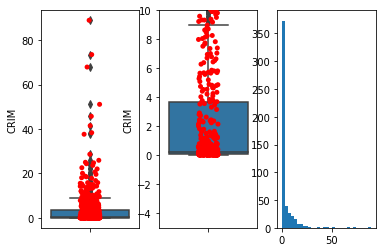

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [109]:
plt.subplot(1, 3, 1)                                                             
sns.stripplot(y = 'CRIM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'CRIM', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'CRIM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'CRIM', data = boston_raw_data)
plt.ylim([-5, 10])
plt.subplot(1, 3, 3)
plt.hist(x = CRIM_Series, bins = 30)
plt.show()
CRIM_Series.describe() # No value below zero and the appearance of high outliers are still too closely distributed to be
                       # treated as outliers.  The frequency histogram illustrates an obvious decay
                       # as Crime Per Capita increases with the number of subhurbs in Boston.

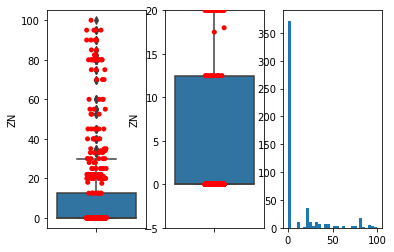

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [129]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'ZN', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'ZN', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'ZN', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'ZN', data = boston_raw_data)
plt.ylim([-5, 20])
plt.subplot(1, 3, 3)
plt.hist(x = ZN_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are between 0 and 100.

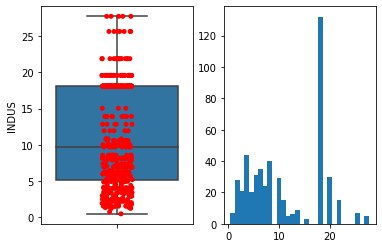

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [130]:
plt.subplot(1, 2, 1)
sns.stripplot(y = 'INDUS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'INDUS', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = INDUS_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values above 0.

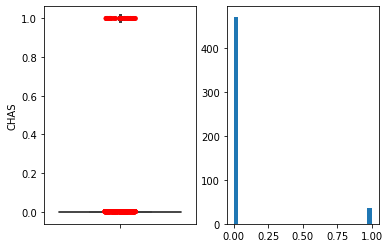

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [131]:
plt.subplot(1, 2, 1)
sns.stripplot(y = 'CHAS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'CHAS', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = CHAS_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are either 0 or 1.

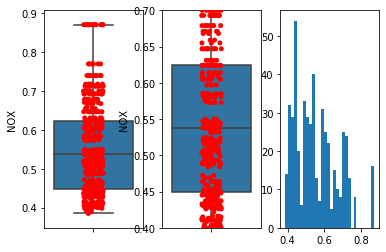

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [132]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'NOX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'NOX', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'NOX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'NOX', data = boston_raw_data)
plt.ylim([0.4, 0.7])
plt.subplot(1, 3, 3)
plt.hist(x = NOX_Series, bins = 30)
plt.show()
CRIM_Series.describe() # Reasonable value range for NOX compounds in ppm.  All values are above 0.

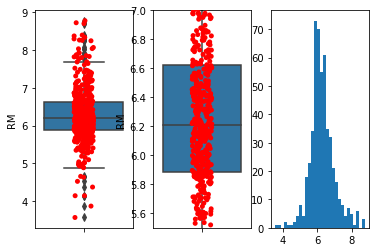

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [133]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'RM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RM', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'RM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RM', data = boston_raw_data)
plt.ylim([5.5, 7])
plt.subplot(1, 3, 3)
plt.hist(x = RM_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are above 0 with no high outlier.

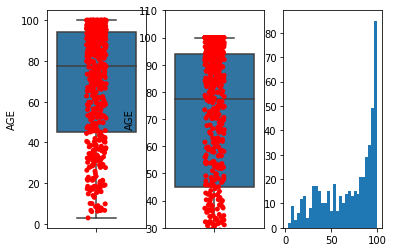

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [134]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'AGE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'AGE', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'AGE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'AGE', data = boston_raw_data)
plt.ylim([30, 110])
plt.subplot(1, 3, 3)
plt.hist(x = AGE_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are inbetween 0 and 100.

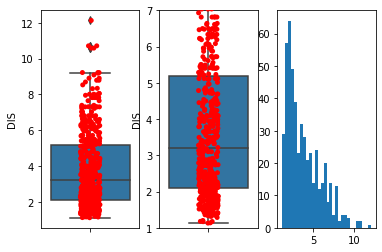

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [135]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'DIS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'DIS', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'DIS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'DIS', data = boston_raw_data)
plt.ylim([1, 7])
plt.subplot(1, 3, 3)
plt.hist(x = DIS_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are above 0.

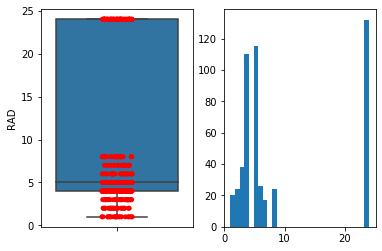

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [136]:
plt.subplot(1, 2, 1)
sns.stripplot(y = 'RAD', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RAD', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = RAD_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values are above 0.

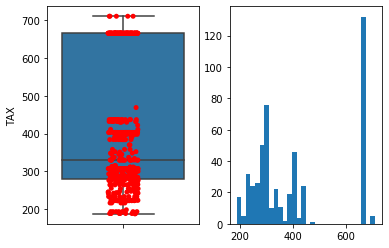

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [137]:
plt.subplot(1, 2, 1)
sns.stripplot(y = 'TAX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'TAX', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = TAX_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values above 0.

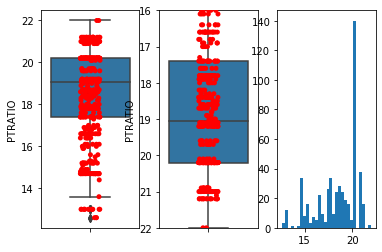

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [141]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'PTRATIO', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PTRATIO', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'PTRATIO', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PTRATIO', data = boston_raw_data)
plt.ylim([22, 16])
plt.subplot(1, 3, 3)
plt.hist(x = PTRATIO_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values above 0 with reasonable ranges for a pupil:teacher ratio.

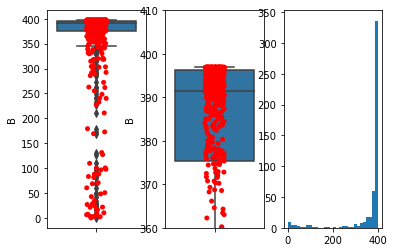

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [142]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'B', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'B', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'B', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'B', data = boston_raw_data)
plt.ylim([360, 410])
plt.subplot(1, 3, 3)
plt.hist(x = B_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values above 0.

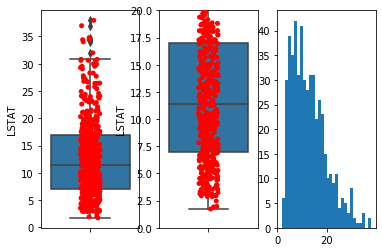

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [140]:
plt.subplot(1, 3, 1)
sns.stripplot(y = 'LSTAT', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'LSTAT', data = boston_raw_data)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'LSTAT', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'LSTAT', data = boston_raw_data)
plt.ylim([0, 20])
plt.subplot(1, 3, 3)
plt.hist(x = LSTAT_Series, bins = 30)
plt.show()
CRIM_Series.describe() # All values above 0.

# Summary of data cleaning:
### All max/min values were within their expected ranges.  Although data was scattered well outside
### the whiskers, no outliers were apparent within any of the attributes mostly due the wide spread of the data.
### All the columns are labelled correctly, all entries are of one datatype; floats.  Perhaps later the CHAD attribute
### datatype might need review later if it's to be treated as a categorical variable during analysis.
### Employing Scikit was successful since the shape of the data was as it initially should have been.